In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

modeling_df = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project2/combined_2010.csv')
### COLUMNSS ###
# Year
# percent_change_cpi
# inflation_rate
# quantity_realestate_loans_billions
# realestate_price_change
# mortage_fixed_rate

modeling_df = modeling_df[modeling_df['Year'] <= 2024]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


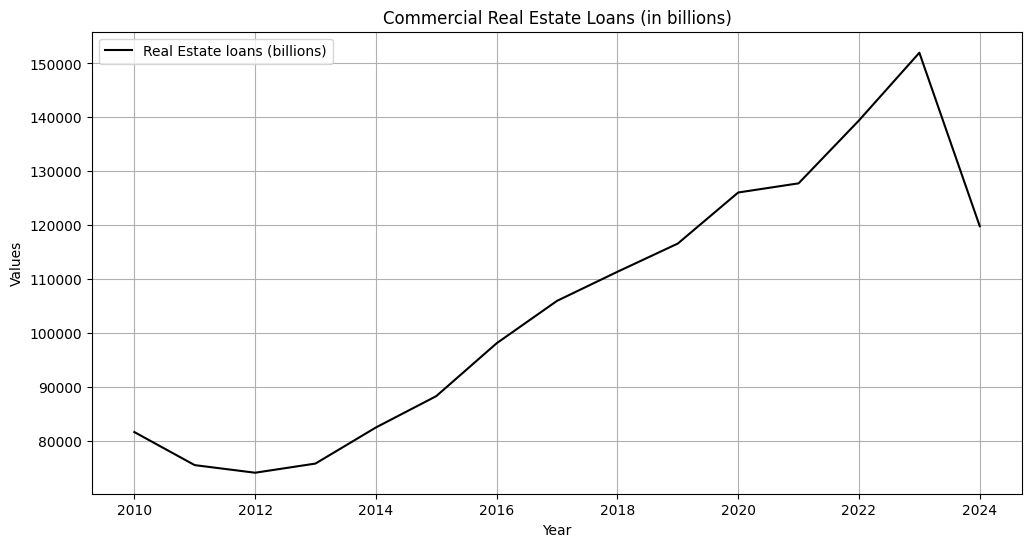

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(modeling_df['Year'], modeling_df['quantity_realestate_loans_billions'], label='Real Estate loans (billions)', color='black')


plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Commercial Real Estate Loans (in billions)')
plt.legend()
plt.grid()
plt.show()


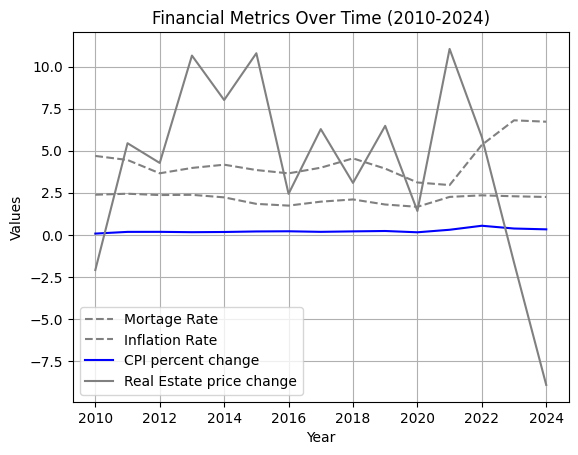

In [16]:
plt.plot(modeling_df['Year'], modeling_df['mortgage_fixed_rate'], label='Mortage Rate', color='grey', linestyle="--")
plt.plot(modeling_df['Year'], modeling_df['inflation_rate'], label='Inflation Rate', color='grey', linestyle="--")
plt.plot(modeling_df['Year'], modeling_df['percent_change_cpi'], label='CPI percent change', color='blue')
plt.plot(modeling_df['Year'], modeling_df['realestate_price_change'], label='Real Estate price change', color='grey')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()

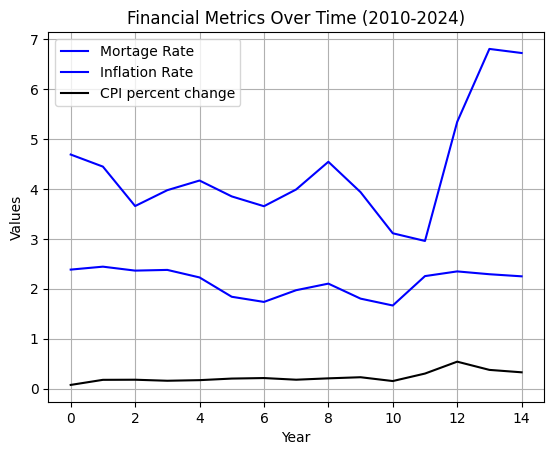

In [13]:
plt.plot(modeling_df.index, modeling_df['mortgage_fixed_rate'], label='Mortage Rate', color='blue')
plt.plot(modeling_df.index, modeling_df['inflation_rate'], label='Inflation Rate', color='blue')
plt.plot(modeling_df.index, modeling_df['percent_change_cpi'], label='CPI percent change', color='black')


plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()

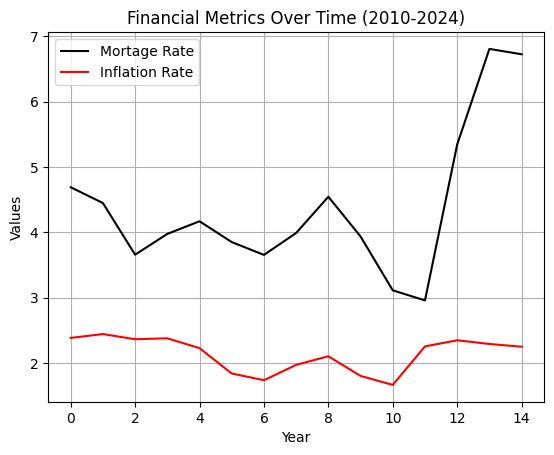

In [15]:
plt.plot(modeling_df.index, modeling_df['mortgage_fixed_rate'], label='Mortage Rate', color='black')
plt.plot(modeling_df.index, modeling_df['inflation_rate'], label='Inflation Rate', color='red')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()

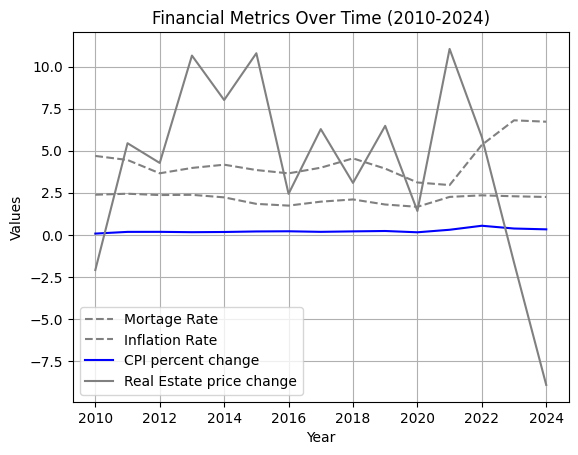

In [ ]:
### NOT SURE IF THIS WORKS OR IS CORRECT, just trying to point in the riht direction ###
### Some modeling to draw some conclusion ###

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Check stationarity for each variable
for col in modeling_df.columns:
    result = adfuller(modeling_df[col])
    print(f'{col}: ADF Statistic: {result[0]}, p-value: {result[1]}')


# Fit VAR model
model = VAR(modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions', 'mortgage_fixed_rate', 'inflation_rate', 'realestate_price_change']])
model_fit = model.fit(maxlags=5)

# Get the last observed values for forecasting
last_observed_values = modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions',
                                     'mortgage_fixed_rate', 'inflation_rate',
                                     'realestate_price_change']].values[-model_fit.k_ar:]


# Forecast for 10 years
forecast = model_fit.forecast(last_observed_values, steps=10)

# Convert forecast to DataFrame for easier handling
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)



Unnamed: 0: ADF Statistic: 0.27237960180970694, p-value: 0.9760411807826693
Year: ADF Statistic: -0.002145508764912539, p-value: 0.958354293925111
percent_change_cpi: ADF Statistic: 0.31202202870252455, p-value: 0.9778893763397393
inflation_rate: ADF Statistic: -1.8645804460938573, p-value: 0.34890255780307156
quantity_realestate_loans_billions: ADF Statistic: -0.5612957068692673, p-value: 0.879490005032989
realestate_price_change: ADF Statistic: 1.6284197456966436, p-value: 0.997940381920305
mortgage_fixed_rate: ADF Statistic: -1.1781444379440038, p-value: 0.6829260635541571


<ipython-input-24-aaa004785e4a>:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)


In [ ]:

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Check stationarity for each variable
for col in modeling_df.columns:
    result = adfuller(modeling_df[col])
    print(f'{col}: ADF Statistic: {result[0]}, p-value: {result[1]}')
    if result[1] > 0.05:
        print(f"{col} is non-stationary. Consider differencing or transformation.")

# Fit VAR model
model = VAR(modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions', 'mortgage_fixed_rate', 'inflation_rate', 'realestate_price_change']])

# Determine optimal lag order
lag_order = model.select_order(maxlags=1)
optimal_lag = lag_order.aic  # or use lag_order.bic for BIC
print(f"Optimal lag order according to AIC: {optimal_lag}")

model_fit = model.fit(optimal_lag)

# Get the last observed values for forecasting
last_observed_values = modeling_df[['percent_change_cpi', 'quantity_realestate_loans_billions',
                                    'mortgage_fixed_rate', 'inflation_rate',
                                    'realestate_price_change']].values[-model_fit.k_ar:]

# Forecast for 10 years
forecast = model_fit.forecast(last_observed_values, steps=10)

# Convert forecast to DataFrame for easier handling
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)

# Display the forecast
print(forecast_df)


Unnamed: 0: ADF Statistic: 0.27237960180970694, p-value: 0.9760411807826693
Unnamed: 0 is non-stationary. Consider differencing or transformation.
Year: ADF Statistic: -0.002145508764912539, p-value: 0.958354293925111
Year is non-stationary. Consider differencing or transformation.
percent_change_cpi: ADF Statistic: 0.31202202870252455, p-value: 0.9778893763397393
percent_change_cpi is non-stationary. Consider differencing or transformation.
inflation_rate: ADF Statistic: -1.8645804460938573, p-value: 0.34890255780307156
inflation_rate is non-stationary. Consider differencing or transformation.
quantity_realestate_loans_billions: ADF Statistic: -0.5612957068692673, p-value: 0.879490005032989
quantity_realestate_loans_billions is non-stationary. Consider differencing or transformation.
realestate_price_change: ADF Statistic: 1.6284197456966436, p-value: 0.997940381920305
realestate_price_change is non-stationary. Consider differencing or transformation.
mortgage_fixed_rate: ADF Statisti

<ipython-input-13-8eb436ea5efa>:31: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)


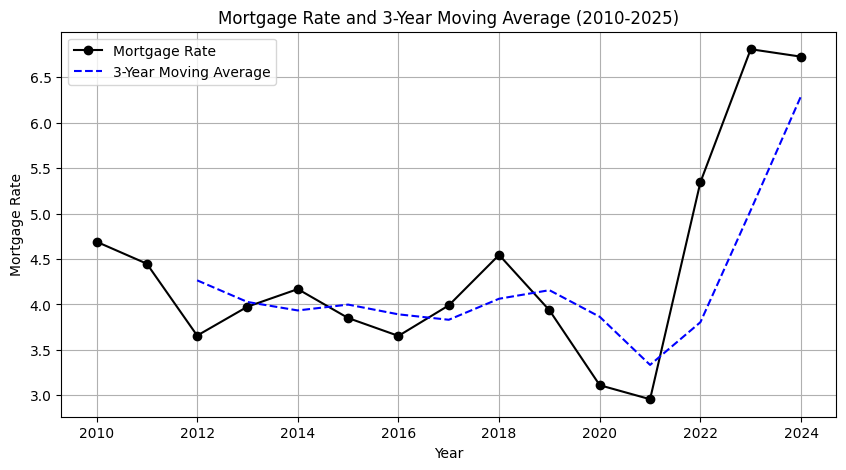

In [21]:
modeling_df['moving_average'] = modeling_df['mortgage_fixed_rate'].rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(modeling_df['Year'], modeling_df['mortgage_fixed_rate'], label='Mortgage Rate', color='black', marker='o')
plt.plot(modeling_df['Year'], modeling_df['moving_average'], label='3-Year Moving Average', color='blue', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Mortgage Rate')
plt.title('Mortgage Rate and 3-Year Moving Average (2010-2025)')
plt.legend()
plt.grid()
plt.show()

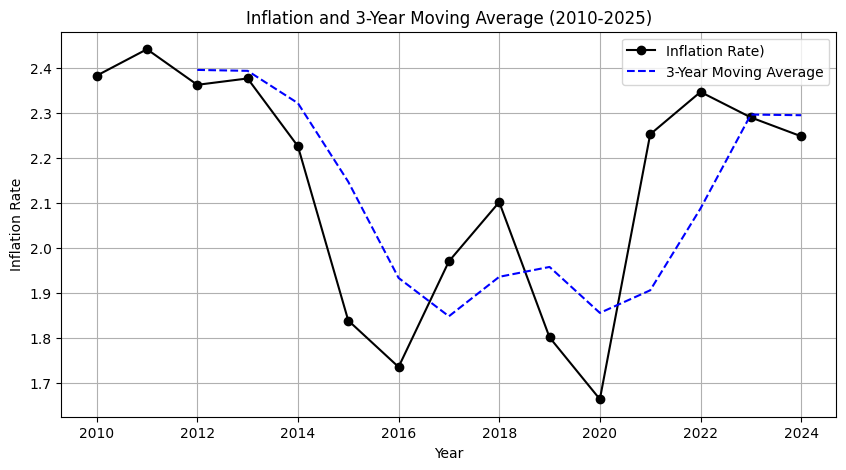

In [22]:
modeling_df['moving_average_inflation'] = modeling_df['inflation_rate'].rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(modeling_df['Year'], modeling_df['inflation_rate'], label='Inflation Rate)', color='black', marker='o')
plt.plot(modeling_df['Year'], modeling_df['moving_average_inflation'], label='3-Year Moving Average', color='blue', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation and 3-Year Moving Average (2010-2025)')
plt.legend()
plt.grid()
plt.show()

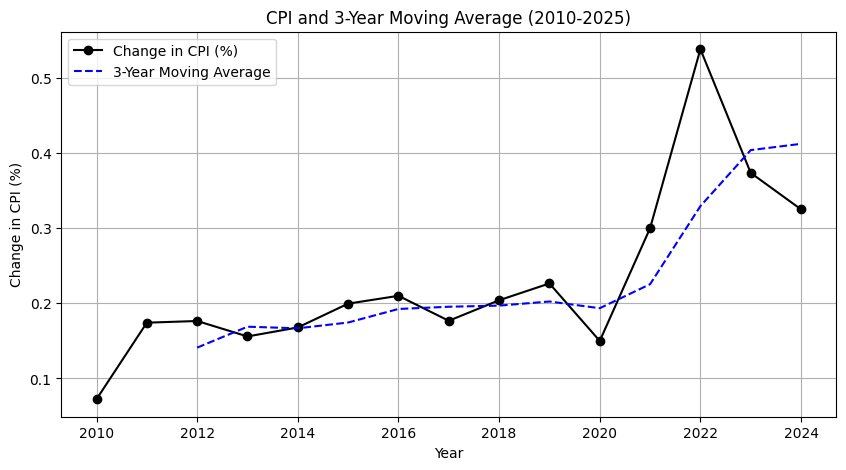

In [19]:
modeling_df['moving_average_cpi'] = modeling_df['percent_change_cpi'].rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(modeling_df['Year'], modeling_df['percent_change_cpi'], label='Change in CPI (%)', color='black', marker='o')
plt.plot(modeling_df['Year'], modeling_df['moving_average_cpi'], label='3-Year Moving Average', color='blue', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Change in CPI (%)')
plt.title('CPI and 3-Year Moving Average (2010-2025)')
plt.legend()
plt.grid()
plt.show()

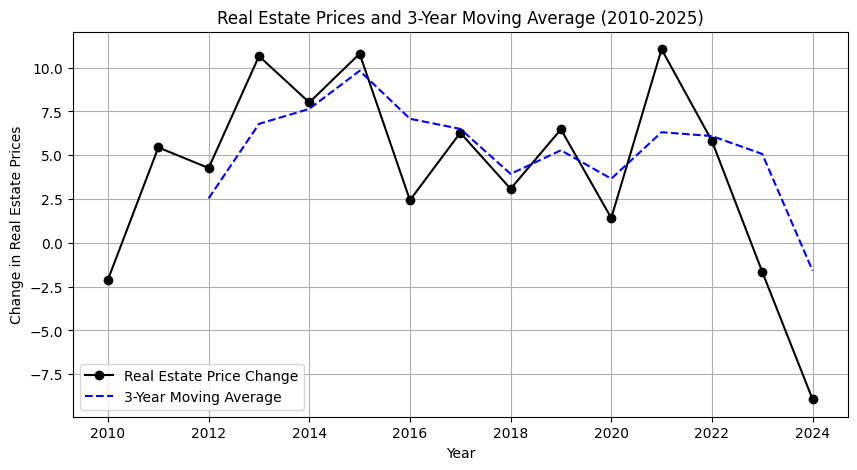

In [23]:
modeling_df['moving_average_reprices'] = modeling_df['realestate_price_change'].rolling(window=3).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 5))
plt.plot(modeling_df['Year'], modeling_df['realestate_price_change'], label='Real Estate Price Change', color='black', marker='o')
plt.plot(modeling_df['Year'], modeling_df['moving_average_reprices'], label='3-Year Moving Average', color='blue', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Change in Real Estate Prices')
plt.title('Real Estate Prices and 3-Year Moving Average (2010-2025)')
plt.legend()
plt.grid()
plt.show()

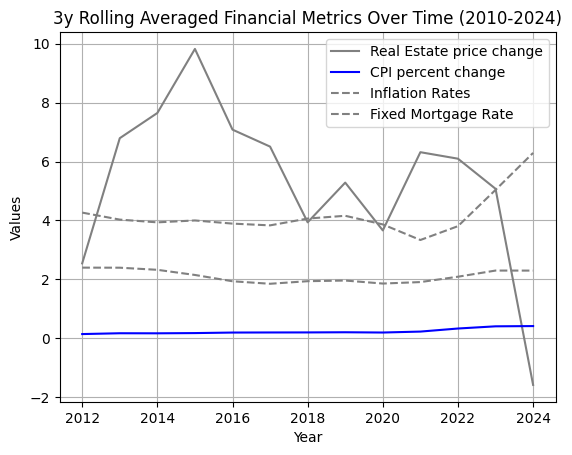

In [36]:
plt.plot(modeling_df['Year'], modeling_df['moving_average_reprices'], label='Real Estate price change', color='grey')
plt.plot(modeling_df['Year'], modeling_df['moving_average_cpi'], label='CPI percent change', color='blue')
plt.plot(modeling_df['Year'], modeling_df['moving_average_inflation'], label='Inflation Rates', color="grey", linestyle="--")
plt.plot(modeling_df['Year'], modeling_df['moving_average'], label='Fixed Mortgage Rate', color='grey', linestyle="--")
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('3y Rolling Averaged Financial Metrics Over Time (2010-2024)')
plt.legend()
plt.grid()
plt.show()

moving_average: ADF Statistic: -2.4207905613426948, p-value: 0.13595419847843582
moving_average is non-stationary. Consider differencing or transformation.
moving_average_cpi: ADF Statistic: 0.611409473191698, p-value: 0.987893502773187
moving_average_cpi is non-stationary. Consider differencing or transformation.
moving_average_inflation: ADF Statistic: -1.573046580263376, p-value: 0.49711738719729176
moving_average_inflation is non-stationary. Consider differencing or transformation.
moving_average_reprices: ADF Statistic: 1.127422564707357, p-value: 0.9954439998010419
moving_average_reprices is non-stationary. Consider differencing or transformation.
Optimal lag order according to AIC: 1
            moving_average  moving_average_cpi  moving_average_inflation  \
2024-12-31        6.857346            0.324296                  2.201242   
2025-12-31        6.262162            0.173896                  2.058443   
2026-12-31        4.653561            0.033647                  1.957570

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
<ipython-input-55-8a7df16043a3>:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)


Text(0.5, 1.0, '10 Year Forecast of Financial Metrics')

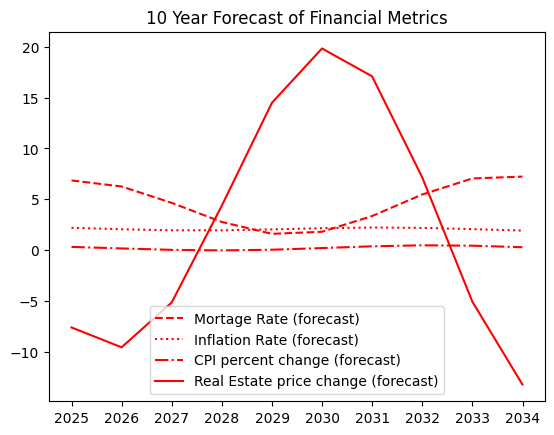

In [55]:
# Check stationarity for each variable
moving_avgs = modeling_df[['moving_average', 'moving_average_cpi', 'moving_average_inflation', 'moving_average_reprices']].dropna()
for col in moving_avgs.columns:
    result = adfuller(moving_avgs[col])
    print(f'{col}: ADF Statistic: {result[0]}, p-value: {result[1]}')
    if result[1] > 0.05:
        print(f"{col} is non-stationary. Consider differencing or transformation.")

# Fit VAR model
model = VAR(moving_avgs)

# Determine optimal lag order
lag_order = model.select_order(maxlags=1)
optimal_lag = lag_order.aic  # or use lag_order.bic for BIC
print(f"Optimal lag order according to AIC: {optimal_lag}")

model_fit = model.fit(optimal_lag)

# Get the last observed values for forecasting
last_observed_values = moving_avgs.values[-model_fit.k_ar:]

# Forecast for 10 years
forecast = model_fit.forecast(last_observed_values, steps=10)

# Convert forecast to DataFrame for easier handling
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024', periods=10, freq='Y'), columns=model_fit.names)

# Display the forecast
print(forecast_df)


plt.plot(forecast_df.index, forecast_df['moving_average'], label='Mortage Rate (forecast)', color='red', linestyle="--")
plt.plot(forecast_df.index, forecast_df['moving_average_inflation'], label='Inflation Rate (forecast)', color='red', linestyle=":")
plt.plot(forecast_df.index, forecast_df['moving_average_cpi'], label='CPI percent change (forecast)', color='red', linestyle="-.")
plt.plot(forecast_df.index, forecast_df['moving_average_reprices'], label='Real Estate price change (forecast)', color='red', linestyle="-")
plt.legend()
plt.title("10 Year Forecast of Financial Metrics")
